> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [patient noshow appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> > two of my friends and i have been working on this course from the begining and we chose to investigate the dataset of movies but it was too overwhelming for us so we chose to work on the data collected in brazil about whether the patients show in their appointment or not<br>this data is collected from around 100k patients in diffrent hopital in Brazil and the data shows diffrent colums we will discuss in the next sections 

### Question(s) for Analysis
>According to the data we have we can ask some question like <br> 
Does the patients with diseases show up more the sound ones or not? <br>
how can the location of the hospital affect the show up of the patient?<br>
Does sending an SMS increase the precent of showing up patients?<br>

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
#reading the file containing the data fortunatly it was sepereated by , 
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head(10) # displaying the first 5 rows to see have an overview about the data 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No



### Data Cleaning
> To start cleaning the data we should first check for duplicates and clean columns to make it more easy to access and read  
 <br>the data is about 110527 patients with 14 different features 

In [4]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
sum(df.duplicated())
df.info() # to get a deeper view of the data  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


the data has no duplicated values and almost no missing values 

In [5]:
# droping some of the unhelpful data like the id of the patient and appointment  some of the patient appeard more than one but i thought it will not be helpful
df.drop(['PatientId','AppointmentID'],1,inplace = True)
df.describe()# we notice some error like age == -1 

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
# getting the index of age < 0 
mask = df.query('Age == "-1"')
mask

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [7]:
df.drop(index = 99832 , inplace = True ) # dropping this value
df.describe()# to see the affect of this stage

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<a id='eda'></a>
## Exploratory Data Analysis

> As we have cleaned the data and showed the error we can start working on understanding the data and making some visuals to understand it better 



> We will start first with the hist to get a general view and then take it column by column



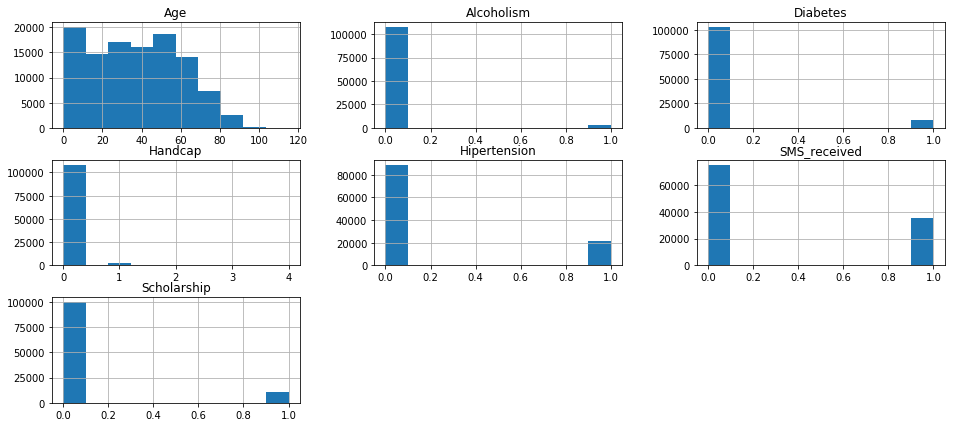

In [8]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.hist(figsize=(16,7));

Here we can make some colclusion like that most of patients are under 80 and the majority of them do have a scholarship around 100000 We can also indicate that many of them suffer from at least one health condition 

### Research Question 1  (showing the relation between the age and showing in the appointment )

In [9]:

show = df['No-show'] =='No'
nshow = df['No-show'] == 'Yes'


Gender
F    39.591126
M    34.461372
Name: Age, dtype: float64 Gender
F    36.16219
M    30.83301
Name: Age, dtype: float64


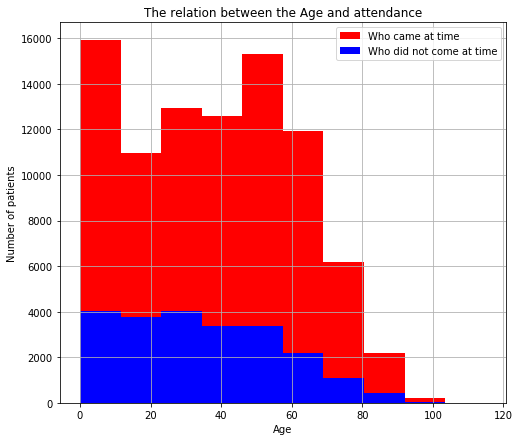

In [43]:
def attendance(df,c_name,title):
    plt.figure(figsize=(8,7))
    df[c_name][show].hist( bins = 10 ,color = 'red',label = 'Who came at time')
    df[c_name][nshow].hist(  bins = 10 ,color = 'blue',label = 'Who did not come at time')
    plt.legend()
    plt.xlabel(c_name)
    plt.ylabel('Number of patients')
    plt.title(title)

    
    
attendance(df,'Age','The relation between the Age and attendance')
print(df[show].groupby('Gender').Age.mean(),df[nshow].groupby('Gender').Age.mean())

As we can see there is no clear corelation between the age and the attendance although it seems that younger age have a higher attendace rate 25%

Scholarship
0    38.497010
1    30.973319
Name: Age, dtype: float64 Scholarship
0    34.950864
1    29.468968
Name: Age, dtype: float64


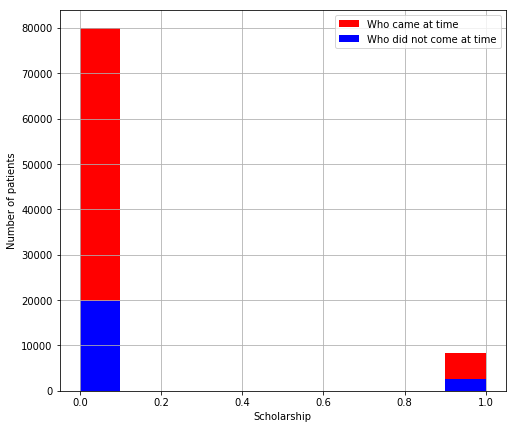

In [48]:
attendance(df,'Scholarship',"Scholarship and attendance ")
print(df[show].groupby('Scholarship').Age.mean(), df[nshow].groupby('Scholarship').Age.mean())

It seems there is no clear relation between scholarship and attendace but it seems that the rate of attendance in who are younger and have scholarship and in statistical way we have 80 % of those who have scholarship and 75% of those who don't have scholarship 

Gender
F    39.591126
M    34.461372
Name: Age, dtype: float64 Gender
F    36.16219
M    30.83301
Name: Age, dtype: float64


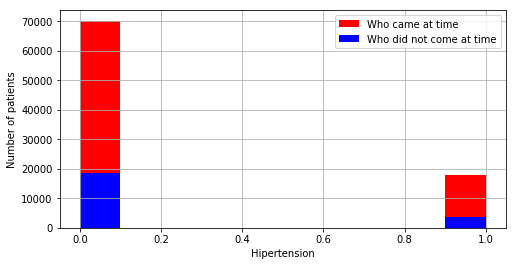

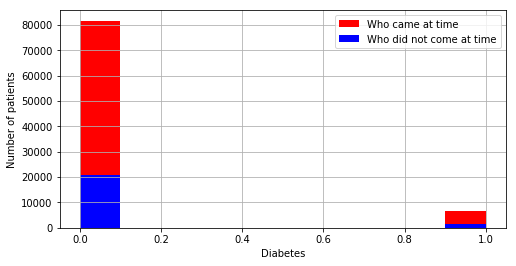

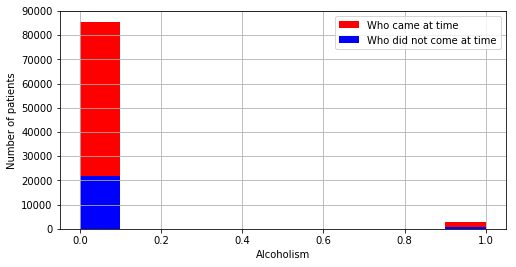

In [31]:
attendance(df,'Hipertension',"hipertension and number of patients")
attendance(df,'Diabetes',"Diabetes and how it affects the number of patients")
attendance(df,'Alcoholism',"Alcoholism vs number of patients")
# I have made some codes to calculate the precentages of gender and diseases so i will make the rest of the conclusion
print("calculating the relation between the diseases and the attendance and if there is a clear relation")

In the diseases data we can see that a good corelation as we can see 78% of those who have hybertension and 85% of who don't
and we see the same in diabetes it is 80% in those who have and 83% who don't 

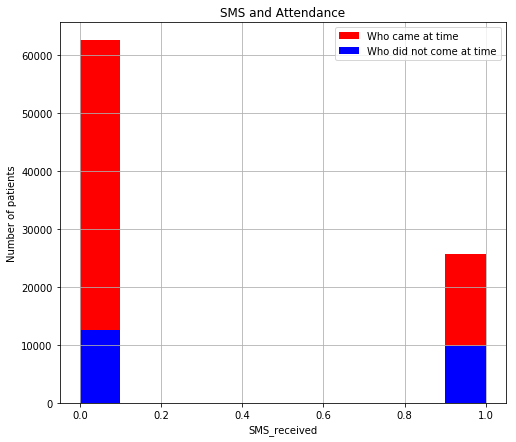

In [70]:
attendance(df,'SMS_received',"SMS and Attendance")

We see a clear relation between the SMS and the attendance so it is an effective way to bring people to hospitals 

Text(0.5,1,'Neigbourhood and attendace are they related')

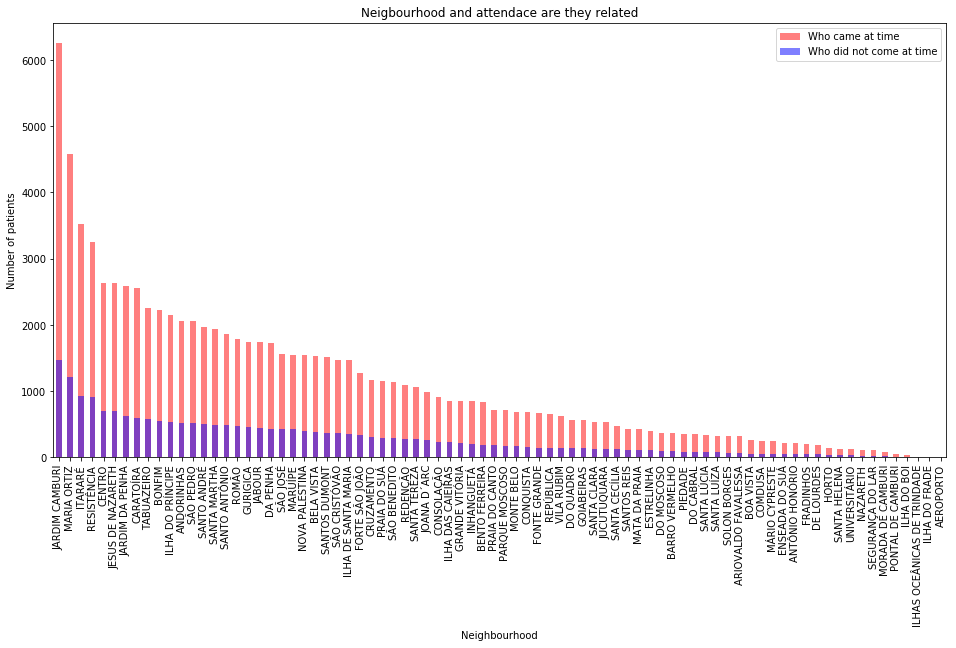

In [68]:
plt.figure(figsize=(16,8))
df.Neighbourhood[show].value_counts().plot (kind ='bar',alpha = .5 ,color = 'red',label = 'Who came at time')
df.Neighbourhood[nshow].value_counts().plot(kind ='bar',alpha = .5 ,color = 'blue',label = 'Who did not come at time')
plt.legend()
plt.xlabel("Neighbourhood")
plt.ylabel('Number of patients')
plt.title("How Neigbourhood and attendace are related")

We can see that people from a specific neighbourhood attend more but the ratio still almost the same so i suspect they are in the rich areas 

<a id='conclusions'></a>
## Conclusions

>The statistics we used to answer the questions we declaired in the introduction 
We can see there is not clear way we can make sure they will attend but we can see clear relationship between these :
the neighbourhood and the SMS we can see some relation but we can see more information like the time between the appointment and the visit time which will have a great impact on the visit
BUT the diseases don't have a clear relation between the appointment and the will they show up or not 
the SMS and the neighbour seems to have the highest impact on the attendace and there is may be other factors
so we can make the time interval shorter and focus more on the SMS and there is some things we don't have control on like the neighbourhood because it seems people in rich neighborhood take care more of their health and the show on their time 



### Limitations
> We don't have lots of limitaions but we can explore more if we found a clear relation between the diseases like diabetes and hypertenson or alcoholism and diseases 
we may also lack info like if the diseases is serious or not and we can use it in pridecting whether they will attend or not and we can also see the if there is any other features of tracking or app to incourage the patients to attend which will provide us with usefl info


## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [71]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0